In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import graphviz
import numpy as np
import re
from sklearn import tree
from sklearn.tree import DecisionTreeRegressor
from sklearn import datasets
from sklearn import preprocessing

In [2]:
df = pd.DataFrame({
    'IndianEconomicCondition': ['Boom', 'Boom', 'Uncertain', 'Recession', 'Recession', 'Recession', 'Uncertain', 'Boom', 'Boom', 'Recession'],
    'GlobalMarketPerformance': ['Good', 'Good', 'Good', 'Bad', 'Ugly', 'Ugly', 'Ugly', 'Bad', 'Ugly', 'Bad'],
    'RBISupportMarket': ['High', 'High', 'High', 'High', 'Normal', 'Normal', 'High', 'Normal', 'Normal' , 'Normal'],
    'BuyerSentiment': ['Weak', 'Strong', 'Weak', 'Weak', 'Weak', 'Strong', 'Strong', 'Weak', 'Weak', 'Weak'],
    'NoOfStocksDown': [0.31, 0.38, 0.58, 0.56, 0.65, 0.29, 0.54, 0.44, 0.48, 0.58]
})
df.to_csv('IndianEconomy.csv' , index = False)

In [3]:
df = pd.read_csv('IndianEconomy.csv')
df

,IndianEconomicCondition,GlobalMarketPerformance,RBISupportMarket,BuyerSentiment,NoOfStocksDown
0,Boom,Good,High,Weak,0.31
1,Boom,Good,High,Strong,0.38
2,Uncertain,Good,High,Weak,0.58
3,Recession,Bad,High,Weak,0.56
4,Recession,Ugly,Normal,Weak,0.65
5,Recession,Ugly,Normal,Strong,0.29
6,Uncertain,Ugly,High,Strong,0.54
7,Boom,Bad,Normal,Weak,0.44
8,Boom,Ugly,Normal,Weak,0.48
9,Recession,Bad,Normal,Weak,0.58


In [4]:
X = df.iloc[: , 0:4]
y = df.iloc[: , -1]

In [5]:
totalcategoricalvalue = \
list(np.unique(X['IndianEconomicCondition']))+list(np.unique(X['GlobalMarketPerformance'])) + \
list(np.unique(X['RBISupportMarket']))+list(np.unique(X['BuyerSentiment'])) + list(['Yes' , 'No'])

# The backslash () is used as a line continuation character in Python. 
# It allows you to break long lines of code into multiple lines for better readability.

In [6]:
totalcategoricalvalue

['Boom',
 'Recession',
 'Uncertain',
 'Bad',
 'Good',
 'Ugly',
 'High',
 'Normal',
 'Strong',
 'Weak',
 'Yes',
 'No']

In [16]:
# Convert X and Y to Encoded Numeric Values

le_main = preprocessing.LabelEncoder()
le_main.fit(totalcategoricalvalue)

X_train = pd.DataFrame()
y_train = pd.DataFrame()

# Transforming categorical value into Numerical
X_train['IndianEconomicCondition'] = le_main.transform(X['IndianEconomicCondition'])
X_train['GlobalMarketPerformance'] = le_main.transform(X['GlobalMarketPerformance'])
X_train['RBISupportMarket'] = le_main.transform(X['RBISupportMarket'])
X_train['BuyerSentiment'] = le_main.transform(X['BuyerSentiment'])
y_train = y
print(X_train)
print(y_train)

Lebel main is :  LabelEncoder()
   IndianEconomicCondition  GlobalMarketPerformance  RBISupportMarket  \
0                        1                        2                 3   
1                        1                        2                 3   
2                        9                        2                 3   
3                        6                        0                 3   
4                        6                        8                 5   
5                        6                        8                 5   
6                        9                        8                 3   
7                        1                        0                 5   
8                        1                        8                 5   
9                        6                        0                 5   

   BuyerSentiment  
0              10  
1               7  
2              10  
3              10  
4              10  
5               7  
6               7  
7   

# Visualize the Mappings

In [8]:
# Print ,What we got encoded as what
mappings = pd.DataFrame()
mappings['class'] = le_main.classes_
mappings['encoded'] = le_main.transform(le_main.classes_) 
mappings

,class,encoded
0,Bad,0
1,Boom,1
2,Good,2
3,High,3
4,No,4
5,Normal,5
6,Recession,6
7,Strong,7
8,Ugly,8
9,Uncertain,9


# Validation Data Sets

In [9]:
df2 = pd.DataFrame({
    'IndianEconomicCondition': ['Recession', 'Recession', 'Recession'],
    'GlobalMarketPerformance': ['Good', 'Good', 'Good'],
    'RBISupportMarket': ['High', 'High', 'High'],
    'BuyerSentiment': ['Weak', 'Strong', 'Strong'],
    'NoOfStocksDown': [0.39 , 0.33 , 0.42]
})
df2.to_csv('IndianEconomy_validation.csv' , index = False)

In [10]:
df2

,IndianEconomicCondition,GlobalMarketPerformance,RBISupportMarket,BuyerSentiment,NoOfStocksDown
0,Recession,Good,High,Weak,0.39
1,Recession,Good,High,Strong,0.33
2,Recession,Good,High,Strong,0.42


In [11]:
X_test = pd.DataFrame()
y_test = pd.DataFrame()

# Here use le_main instance
X_test['IndianEconomicCondition'] = le_main.transform(df2['IndianEconomicCondition'])
X_test['GlobalMarketPerformance'] = le_main.transform(df2['GlobalMarketPerformance'])
X_test['RBISupportMarket'] = le_main.transform(df2['RBISupportMarket'])
X_test['BuyerSentiment'] = le_main.transform(df2['BuyerSentiment'])
y_test = df2['NoOfStocksDown']
print(X_test)
print(y_test)

   IndianEconomicCondition  GlobalMarketPerformance  RBISupportMarket  \
0                        6                        2                 3   
1                        6                        2                 3   
2                        6                        2                 3   

   BuyerSentiment  
0              10  
1               7  
2               7  
0    0.39
1    0.33
2    0.42
Name: NoOfStocksDown, dtype: float64


# Decision Tree Model-Regression

In [22]:
def getTotalAbsoluteError(X_t , y_t , modelInput): 
    predictedValues = modelInput.predict(X_t)
    errors = y_t.values.flatten() - predictedValues
    return (sum(abs(errors)))

# Tree Depth

C:\Users\arups\AppData\Local\Temp\ipykernel_1292\2783841975.py:18: UserWarning: color is redundantly defined by the 'color' keyword argument and the fmt string "rs-" (-> color='r'). The keyword argument will take precedence.
  ax.plot(errIndex , err , 'rs-' , color = 'orange' , linewidth = 1.5)
C:\Users\arups\AppData\Local\Temp\ipykernel_1292\2783841975.py:19: UserWarning: color is redundantly defined by the 'color' keyword argument and the fmt string "rs-" (-> color='r'). The keyword argument will take precedence.
  ax.plot(errIndex , errTest , 'rs-' , color = 'green' , linewidth = 1.5)


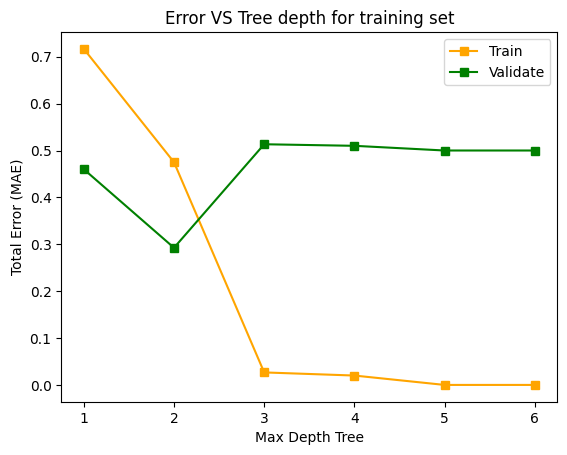

In [23]:
err = []
errIndex = []
errTest = []

# Model training: The decision tree regressor algorithm utilizes the training data to construct 
# a decision tree that captures the patterns and relationships between the features and target values.
# The tree structure is built based on the specified hyperparameters, such as the maximum depth (max_depth), 
# which determines the depth of the tree.

for treedepth in range(1 , 7):
    clf2 = DecisionTreeRegressor(random_state = 2345 , max_depth=treedepth)
    model2 = clf2.fit(X_train , y_train)
    err.append(getTotalAbsoluteError(X_train , y_train , model2))
    errTest.append(getTotalAbsoluteError(X_test , y_test , model2))
    errIndex.append(treedepth)
    
fig , ax = plt.subplots()
ax.plot(errIndex , err , 'rs-' , color = 'orange' , linewidth = 1.5)
ax.plot(errIndex , errTest , 'rs-' , color = 'green' , linewidth = 1.5)
ax.set_xlabel('Max Depth Tree')
ax.set_ylabel('Total Error (MAE)')
ax.set_title('Error VS Tree depth for training set')
plt.legend(['Train' , 'Validate'])
plt.show()

# Min Sample Leaves

C:\Users\arups\AppData\Local\Temp\ipykernel_1292\1537085392.py:13: UserWarning: color is redundantly defined by the 'color' keyword argument and the fmt string "rs-" (-> color='r'). The keyword argument will take precedence.
  ax.plot(errIndex , err , 'rs-' , color = 'orange' , linewidth = 1.5)
C:\Users\arups\AppData\Local\Temp\ipykernel_1292\1537085392.py:14: UserWarning: color is redundantly defined by the 'color' keyword argument and the fmt string "rs-" (-> color='r'). The keyword argument will take precedence.
  ax.plot(errIndex , errTest , 'rs-' , color = 'green' , linewidth = 1.5)


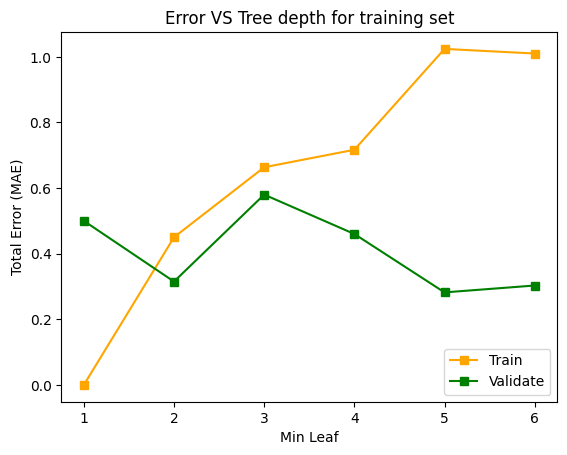

In [14]:
err = []
errIndex = []
errTest = []
 
for leafcount in range(1 , 7):
    clf2 = DecisionTreeRegressor(random_state = 2345 , min_samples_leaf = leafcount)
    model2 = clf2.fit(X_train , y_train)
    err.append(getTotalAbsoluteError(X_train , y_train , model2))
    errTest.append(getTotalAbsoluteError(X_test , y_test , model2))
    errIndex.append(leafcount)
    
fig , ax = plt.subplots()
ax.plot(errIndex , err , 'rs-' , color = 'orange' , linewidth = 1.5)
ax.plot(errIndex , errTest , 'rs-' , color = 'green' , linewidth = 1.5)
ax.set_xlabel('Min Leaf')
ax.set_ylabel('Total Error (MAE)')
ax.set_title('Error VS Tree depth for training set')
plt.legend(['Train' , 'Validate'] , loc = 'lower right')
plt.show()

# Another way of display using export_text

In [15]:
print(tree.export_text(clf2))

|--- value: [0.48]



In [21]:
from sklearn import preprocessing

totalcategoricalvalue = ['Boom', 'Recession', 'Uncertain', 'Bad', 'Good', 'Ugly', 'High', 'Normal', 'Strong', 'Weak', 'Yes', 'No']

le_main = preprocessing.LabelEncoder()
le_main.fit(totalcategoricalvalue)

encoded_values = le_main.transform(totalcategoricalvalue)

print(encoded_values)


[ 1  6  9  0  2  8  3  5  7 10 11  4]
